# Forth Step - Machine Learning
in this file we used machine learning of regression models in order to achieve our research goal.
"can we predict how polular a new dataset in the website KAGGLE can be -> with Ranking, with Views and with downloads"

# Imports

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import sklearn
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Perceptron, SGDClassifier,LogisticRegression,LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA,KernelPCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)
# show several prints in one cell. This will allow us to condence every trick in one cell.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)


In [3]:
df= pd.read_csv("All_Data_Stored_From_Kaggle_after_cleaning.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2674 entries, 0 to 2673
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2674 non-null   int64  
 1   Title                2674 non-null   object 
 2   SubTitle             2674 non-null   object 
 3   Version              2674 non-null   int64  
 4   Date Num             2674 non-null   int64  
 5   Date Type            2674 non-null   object 
 6   Usability            2674 non-null   float64
 7   Rating               2674 non-null   int64  
 8   Views                2674 non-null   int64  
 9   Downloads            2674 non-null   int64  
 10  Notebooks            2674 non-null   int64  
 11  Topics               2674 non-null   int64  
 12  Number Of Files      2674 non-null   int64  
 13  File Size            2674 non-null   float64
 14  File Size Type       2674 non-null   object 
 15  Author               2674 non-null   o

# Removing non-Numeric Columns

In [4]:
df = df.drop(labels = ['Unnamed: 0', 'Title', 'SubTitle', 'Date Type', 'Author','Experience Num','Location',
                       'Experience Num Type', 'Date Num','File Size','File Size Type'], axis = 1).copy()

In [5]:
df

,Version,Usability,Rating,Views,Downloads,Notebooks,Topics,Number Of Files,Followers,Following,Owned Datasets,Code Helper,Discussion,Competitions,size in Mb,Date in days,Experience in days
0,8,9.100,367,92967,15336,1771,4,80,1092,229,28,44,930,129,2.130,365,2555
1,2,8.200,639,112406,9760,1460,4,1,0,0,1,0,0,0,3.700,1460,0
2,1,5.900,204,56658,8014,1513,0,5074,1602,30,44,230,675,1,18.560,1460,1825
3,1,7.100,364,65139,9916,1753,1,1,10,0,5,9,6,1,83.590,1825,1825
4,3,8.200,10356,145172,12857,12,39,30,926,17,29,21,258,0,3.630,210,1460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2669,1,10.000,11,1414,191,3,0,1,35,17,47,18,233,1,3.350,60,365
2670,5,6.900,9,341,44,0,0,146000,27,3,6,14,8,1,15740.000,30,730
2671,1,10.000,37,13243,1603,9,1,1,1,0,1,1,1,3,7.540,90,150
2672,1,10.000,278,106585,12168,67,2,1,25,81,4,1,28,0,0.227,365,365


# Removing outliers with IQR

In [6]:
def remove_outliers(X_train, X_test, y_train, y_test):
    X_train=X_train.copy()
    X_test= X_test.copy()
    y_train= y_train.copy()
    y_test= y_test.copy()
    col_list = X_train.columns
    for col in col_list:
        Q1 = np.percentile(X_train[col], 15)
        Q3 = np.percentile(X_train[col], 85)
        IQR = Q3 - Q1
        X_train.loc[(X_train[col] < Q1 - 1.5*IQR) | (X_train[col] > Q3 + 1.5*IQR ),col]= np.nan
        X_test.loc[(X_test[col] < Q1 - 1.5*IQR) | (X_test[col] > Q3 + 1.5*IQR ),col] = np.nan
    X_train.dropna(inplace=True)
    X_test.dropna(inplace=True)
    return X_train, X_test, y_train[list(X_train.index)], y_test[list(X_test.index)]

# Scaling the data with StandardScaler

In [7]:
def scale_data(X_train, X_test):
    X_train_scaled = X_train.copy()
    X_test_scaled = X_test.copy()
    col_list = X_train.columns
    the_scaler = StandardScaler(with_std  = True ,with_mean = True, copy = True)
    
    for col in col_list:
        X_train_scaled[col] = the_scaler.fit_transform(X_train[[col]]) 
        X_test_scaled[col] = the_scaler.transform(X_test[[col]]) 

    return X_train_scaled, X_test_scaled


# Removing the most correlated data
#### because it is not giving us new information

In [8]:
def remove_correlated(X_train, X_test):
    corralation_matrix = X_train.corr().abs()
    upper = corralation_matrix.where(np.triu(np.ones(corralation_matrix.shape), k=1).astype(np.bool))
    to_drop = [column for column in upper.columns if any(upper[column] > 0.94)]
    X_train = X_train.drop(to_drop, axis=1)
    X_test = X_test.drop(to_drop, axis=1)
    
    return X_train, X_test

# Machine Learning's process

## we wanted to predict on continuous variable -> we choose regression models  

#### Define the models that we worked on
1. Linear Regression
2. Ridge Regression
3. Lasso Regression
4. KNN Regression
5. Random Forest Regressor

In [9]:
reg_models={
    'LinReg'            : LinearRegression(),
    'RidgeReg'          : Ridge(alpha=0.001),
    'LassoReg'          : Lasso(alpha=0.001),
    'KNNReg'            : KNeighborsRegressor(n_neighbors=9),
    'random'            :RandomForestRegressor(max_depth=2, random_state=42)
}

## 1. We will try to predict how much Rating Dataset will get.

In [10]:
RatingDF = df.copy()

#### Define the columns that we worked on

In [11]:
X = RatingDF.drop('Rating',1)
y = RatingDF['Rating']

# prepering the dataset
* splitting the data into train and test
* removing the outliers
* scalling the data
* removing the corralated columns

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_test, y_train, y_test = remove_outliers(X_train, X_test, y_train, y_test)
X_train, X_test = scale_data(X_train, X_test)
X_train,X_test= remove_correlated(X_train, X_test)

# Creating a DataFrame to compare all the models
* r2 -> R^2 (coefficient of determination) regression score function.
* RMSE -> root mean square error
* Cross Validation -> using the cross validation to check if there is a overfitting

In [13]:
df_metrics=pd.DataFrame([])
for model_name in reg_models:
    met={}
    
    clf_model = reg_models[model_name].fit(X_train, y_train)
    y_pred = clf_model.predict(X_test)
    met['r2']= r2_score(y_test, y_pred)
    met['RMSE']= np.sqrt(mean_squared_error(y_test,y_pred))
    met['Cross Validation']= cross_val_score(reg_models[model_name], X_train, y_train,scoring='r2', cv=10).mean()
    df_metrics=pd.concat([df_metrics,pd.DataFrame(met,index=[model_name]).T],axis=1)

df_metrics.T.style.highlight_max(subset=['r2','Cross Validation'],color='lightgreen').highlight_min(subset='RMSE',color='lightgreen').set_precision(3)

,r2,RMSE,Cross Validation
LinReg,0.822,32.295,0.819
RidgeReg,0.822,32.295,0.819
LassoReg,0.822,32.295,0.819
KNNReg,0.651,45.274,0.669
random,0.805,33.841,0.757


# The Best Model -> Lasso Regression (R2 -> 82.2%)

In [14]:
clf_model = reg_models['LassoReg'].fit(X_train, y_train)
y_pred = clf_model.predict(X_test)

# Plot of the Best Model

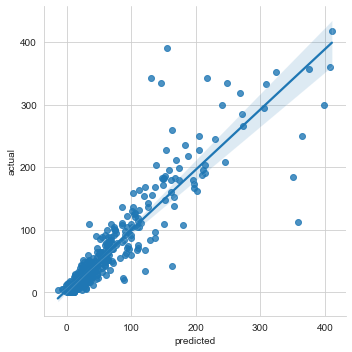

In [15]:
dataset = pd.DataFrame({"predicted":y_pred,"actual":y_test})
sns.set_style('whitegrid')
sns.lmplot(x ='predicted', y ='actual', data = dataset)

# The conclution:
* we got accuracy of 82.2% with r2 on our best model -> "Lasso Regression model".
* to sum up, we found a successful regression model that will predict the rating of new dataset.

## 2. We will try to predict how many Views Dataset will get.

In [16]:
ViewsDF = df.copy()

#### Define the columns that we worked on

In [17]:
X = ViewsDF.drop('Views',1)
y = ViewsDF['Views']

# prepering the dataset
* splitting the data into train and test
* scalling the data
* removing the outliers
* removing the corralated columns

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train, X_test, y_train, y_test = remove_outliers(X_train, X_test, y_train, y_test)
X_train, X_test = scale_data(X_train, X_test)
X_train,X_test= remove_correlated(X_train, X_test)

In [22]:
df_metrics=pd.DataFrame([])
for model_name in reg_models:
    met={}
    
    clf_model = reg_models[model_name].fit(X_train, y_train)
    y_pred = clf_model.predict(X_test)
    met['r2']= r2_score(y_test, y_pred)
    met['RMSE']= np.sqrt(mean_squared_error(y_test,y_pred))
    met['Cross Validation']= cross_val_score(reg_models[model_name], X_train, y_train,scoring='r2', cv=10).mean()
    df_metrics=pd.concat([df_metrics,pd.DataFrame(met,index=[model_name]).T],axis=1)

df_metrics.T.style.highlight_max(subset=['r2','Cross Validation'],color='lightgreen').highlight_min(subset='RMSE',color='lightgreen').set_precision(3)

,r2,RMSE,Cross Validation
LinReg,0.807,13374.400,0.817
RidgeReg,0.807,13374.401,0.817
LassoReg,0.807,13374.399,0.817
KNNReg,0.668,17526.237,0.687
random,0.752,15146.281,0.761


# The Best Model -> Lasso Regression (80.7%)

In [20]:
clf_model = reg_models['LassoReg'].fit(X_train, y_train)
y_pred = clf_model.predict(X_test)

# Plot of the Best Model 

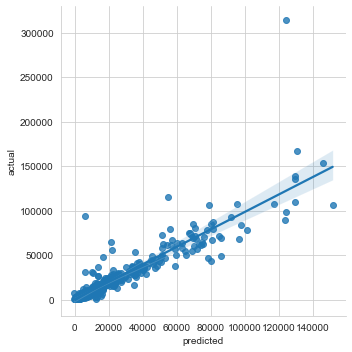

In [21]:

dataset = pd.DataFrame({"predicted":y_pred,"actual":y_test})
sns.set_style('whitegrid')
sns.lmplot(x ='predicted', y ='actual', data = dataset)

# The conclution:
* we got accuracy of 80.7% with r2 on our best model -> "Lasso Regression model".
* to sum up, we found a successful regression model that will predict for a new dataset the number of views.